In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('seismic data.csv')
data

,fid,id,class_bage,class_str,class_tree,class_pop,class_imp,class_bup,Intersection_DN,check_output_class,4_class_mann_verify_4_class,v 100100 imp — v_100100_imp_true_out,v 100100 imp — v_100100_imp_true_out4
0,1,81,3,3,6,3,3,2,3,3,1,1,1
1,2,82,3,3,8,3,3,5,4,3,1,1,1
2,3,295,3,8,4,3,3,2,3,3,1,1,1
3,4,296,3,5,2,3,3,5,4,3,1,1,1
4,5,297,5,10,8,3,3,5,4,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24611,24612,45041,8,3,2,5,3,2,4,4,2,4,2
24612,24613,45042,8,3,2,5,3,2,4,4,2,4,2
24613,24614,45043,5,3,6,5,3,2,4,4,2,4,2
24614,24615,45255,8,3,6,5,3,2,4,4,2,4,2


In [ ]:
data=data.drop(['fid','id','Intersection_DN','check_output_class','4_class_mann_verify_4_class','v 100100 imp — v_100100_imp_true_out'], axis=1)
data

,class_bage,class_str,class_tree,class_pop,class_imp,class_bup,v 100100 imp — v_100100_imp_true_out4
0,3,3,6,3,3,2,1
1,3,3,8,3,3,5,1
2,3,8,4,3,3,2,1
3,3,5,2,3,3,5,1
4,5,10,8,3,3,5,1
...,...,...,...,...,...,...,...
24611,8,3,2,5,3,2,2
24612,8,3,2,5,3,2,2
24613,5,3,6,5,3,2,2
24614,8,3,6,5,3,2,2


In [ ]:
y=data['v 100100 imp — v_100100_imp_true_out4']
X=data.drop(['v 100100 imp — v_100100_imp_true_out4'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
print("X_train:",train_x.shape)
print("X_test:",test_x.shape)
print("y_train:",train_y.shape)
print("y_test:",test_y.shape)

X_train: (18462, 6)
X_test: (6154, 6)
y_train: (18462,)
y_test: (6154,)


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)


In [ ]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
rf_mod = grid_search.best_estimator_
print(rf_mod)
rfc_pred = rf_mod.predict(test_x)

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get the predictions
#
y_pred = rf_mod.predict(test_x)
#
# Calculate the confusion matrix
#
cm = confusion_matrix(test_y, y_pred)
#
# Print the confusion matrix using Matplotlib
#
ConfusionMatrixDisplay(cm).plot()

NameError: ignored

In [ ]:
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           2       0.56      0.69      0.62       926
           3       0.68      0.73      0.71      1681
           4       0.36      0.36      0.36       618
           5       0.40      0.31      0.35       439
           6       0.38      0.31      0.34       461
           7       0.44      0.54      0.49       708
           8       0.46      0.30      0.37       660
           9       0.20      0.18      0.19       235
          10       0.31      0.26      0.28       426

    accuracy                           0.50      6154
   macro avg       0.42      0.41      0.41      6154
weighted avg       0.49      0.50      0.49      6154



In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#visualize tree for Random Forest
from sklearn.tree import export_graphviz
import graphviz
for i in range(1):
    tree = grid_search.best_estimator_[i]
    dot_data = export_graphviz(tree,
                               feature_names=['street_intersection',	'imp_structure',	'building_age',	'population',	'tree_density',	'built_up'],  
                               filled=True,  
                                
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
rfc_prob = rf_mod.predict_proba(test_x)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

rf_comp =  RandomForestClassifier()
knn_comp = KNeighborsClassifier(n_neighbors=5)
svm_comp =  svm.SVC()
dec_comp = DecisionTreeRegressor()
rf_compM = rf_comp.fit(train_x, train_y)
knn_compM = knn_comp.fit(train_x, train_y)
svm_compM = svm_comp.fit(train_x, train_y)
dec_compM=dec_comp.fit(train_x,train_y)

In [ ]:
pred_rf_comp= rf_compM.predict(test_x)
pred_knn_comp = knn_compM.predict(test_x)
pred_svm_comp = svm_compM.predict(test_x)
pred_dec_comp=dec_compM.predict(test_x)
print(classification_report(test_y, pred_rf_comp))
print(classification_report(test_y, pred_knn_comp))
print(classification_report(test_y, pred_svm_comp))
# print(pred_dec_comp)
print(classification_report(test_y,pred_dec_comp.astype(int)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        69
           2       0.98      0.99      0.99       101
           3       0.99      0.99      0.99        68
           4       1.00      0.96      0.98        26

    accuracy                           0.98       264
   macro avg       0.99      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

              precision    recall  f1-score   support

           1       0.96      0.97      0.96        69
           2       0.96      0.97      0.97       101
           3       0.93      0.96      0.94        68
           4       0.95      0.81      0.88        26

    accuracy                           0.95       264
   macro avg       0.95      0.93      0.94       264
weighted avg       0.95      0.95      0.95       264

              precision    recall  f1-score   support

           1       0.96      0.99      0.97        69
           2       0.

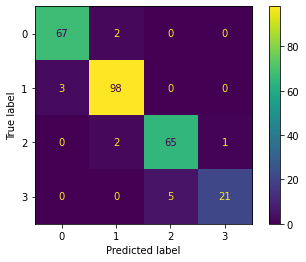

In [ ]:
# knn model
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get the predictions
#
y_pred = knn_compM.predict(test_x)
#
# Calculate the confusion matrix
#
cm = confusion_matrix(test_y, y_pred)
#
# Print the confusion matrix using Matplotlib
#
ConfusionMatrixDisplay(cm).plot()

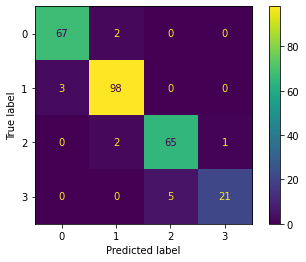

In [ ]:
# knn model
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get the predictions
#
y_pred = knn_compM.predict(test_x)
#
# Calculate the confusion matrix
#
cm = confusion_matrix(test_y, y_pred)
#
# Print the confusion matrix using Matplotlib
#
ConfusionMatrixDisplay(cm).plot()

Random Forest Classifier
            importance
class_pop     0.666266
class_bage    0.096071
class_bup     0.093295
class_tree    0.074219
class_str     0.061330
class_imp     0.008820


<Axes: >

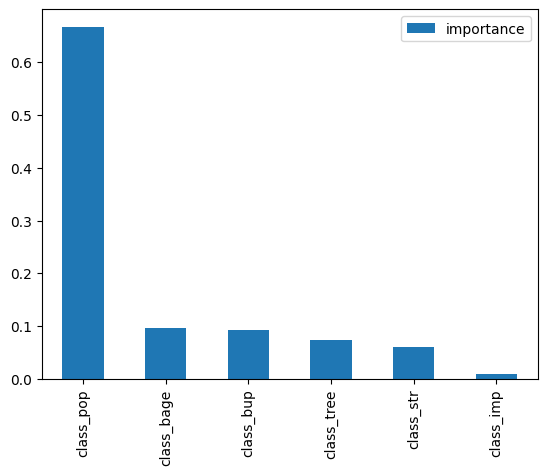

In [ ]:
print("Random Forest Classifier")
columns_ = data.iloc[:1, :6].columns
importance = pd.DataFrame(rf_mod.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(importance)

# fig, ax = plt.subplots()
importance.plot.bar()

Decision Tree Classifier
           importance
pop_cl       0.756274
b_up_cl      0.134348
b_age_cl     0.045138
tree_cl      0.029243
street_cl    0.020851
imp_st_cl    0.014147


<Axes: >

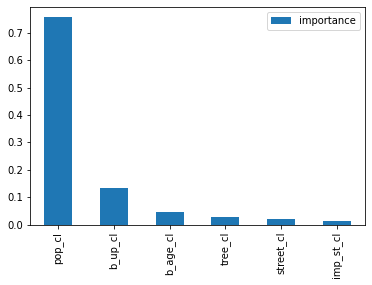

In [ ]:
print("Decision Tree Classifier")
columns_ = data.iloc[:1, :6].columns
importance3 = pd.DataFrame(dec_compM.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(importance3)

# fig, ax = plt.subplots()
importance3.plot.bar()